In [12]:
from carla.data.catalog import OnlineCatalog
from carla import MLModelCatalog
from carla.recourse_methods import Clue

# load a catalog dataset
data_name = "compas"
dataset = OnlineCatalog(data_name)
num = 100

In [13]:
# load artificial neural network from catalog
model = MLModelCatalog(dataset, "ann", backend="pytorch")

In [14]:
from carla.models.negative_instances import predict_negative_instances
# generate counterfactual examples
factuals = predict_negative_instances(model, dataset._df).iloc[:num]
factuals

C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\carla\models\catalog\ANN_TORCH\model_ann.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


,age,two_year_recid,priors_count,length_of_stay,score,c_charge_degree_M,race_Other,sex_Male
4,0.294872,1.0,0.368421,0.00875,1,0.0,1.0,1.0
24,0.115385,1.0,0.210526,0.02250,1,0.0,0.0,1.0
27,0.153846,1.0,0.236842,0.05625,0,0.0,1.0,1.0
33,0.205128,1.0,0.552632,0.04250,0,0.0,0.0,1.0
40,0.089744,1.0,0.236842,0.00875,0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
695,0.141026,0.0,0.421053,0.02250,0,0.0,0.0,1.0
703,0.217949,1.0,0.342105,0.00750,0,0.0,0.0,1.0
706,0.320513,0.0,0.526316,0.00250,0,0.0,0.0,1.0
708,0.384615,1.0,0.657895,0.00875,0,0.0,0.0,1.0


In [26]:
pre = model.predict(factuals)

In [16]:
hyperparams = {
        "data_name": data_name,
        "train_vae": True,
        "width": 10,
        "depth": 3,
        "latent_dim": 12,
        "batch_size": 64,
        "epochs": 1,
        "lr": 0.001,
        "early_stop": 20,
    }

# load a recourse model and pass black box model
rm = Clue(dataset, model, hyperparams)

[INFO] 
Net: [utils.py __init__]
[INFO] VAE_gauss_net [fc_gauss_cat.py __init__]
[INFO] Total params: 0.00M [fc_gauss_cat.py create_net]
[INFO] 
Network: [train.py train_VAE]
[INFO] 
Train: [train.py train_VAE]
[INFO] init cost variables: [train.py train_VAE]
[INFO] it 0/1, vlb -11.090858,  [train.py train_VAE]
[INFO] time: 0.616000 seconds
 [train.py train_VAE]
[INFO] vlb -7.911866 (-inf)
 [train.py train_VAE]
[INFO] Writting C:\Users\drobi\carla\models\autoencoders\clue\fc_VAE_compas_models\theta_best.dat
 [utils.py save]
[INFO] Writting C:\Users\drobi\carla\models\autoencoders\clue\fc_VAE_compas_models/theta_last.dat
 [utils.py save]
[INFO] average time: 0.743999 seconds
 [train.py train_VAE]
[INFO] 
RESULTS: [train.py train_VAE]
[INFO] best_vlb_dev: -7.911866 [train.py train_VAE]
[INFO] best_vlb_train: -11.090858 [train.py train_VAE]
[INFO] nb_parameters: 1111 (1.08KB)
 [train.py train_VAE]
[INFO] 
Net: [utils.py __init__]
[INFO] VAE_gauss_net [fc_gauss_cat.py __init__]
[INFO] Tota

In [17]:
counterfactuals = rm.get_counterfactuals(factuals)

C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\carla\models\api\mlmodel.py:153: UserWarning: cannot re-order features for non dataframe input: <class 'numpy.ndarray'>
  f"cannot re-order features for non dataframe input: {type(x)}"
C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\carla\models\api\mlmodel.py:153: UserWarning: cannot re-order features for non dataframe input: <class 'torch.Tensor'>
  f"cannot re-order features for non dataframe input: {type(x)}"


In [30]:
counterfactuals

,age,two_year_recid,priors_count,length_of_stay,c_charge_degree_M,race_Other,sex_Male,score
0,-0.107281,0.708943,-0.337615,-0.440131,-0.087043,0.149359,0.033438,1.0
1,-0.231627,0.741312,0.140517,-0.349136,0.239914,-0.100554,0.045770,1.0
2,-0.107281,0.708943,-0.337615,-0.440131,-0.087043,0.149359,0.033438,1.0
3,-0.107281,0.708943,-0.337615,-0.440131,-0.087043,0.149359,0.033438,1.0
4,0.231322,0.803470,0.013340,-0.076776,0.784289,-0.602845,0.381995,1.0
5,-0.107281,0.708943,-0.337615,-0.440131,-0.087043,0.149359,0.033438,1.0
6,-0.489439,-0.229245,-0.120459,-0.395137,0.713893,0.142006,0.695933,1.0
7,0.168708,1.156017,0.047661,-0.452207,0.389203,-0.459903,0.227557,1.0
8,0.168708,1.156017,0.047661,-0.452207,0.389203,-0.459903,0.227557,1.0
9,0.369517,1.342462,0.026341,-0.602625,0.553692,-0.561772,0.343202,1.0


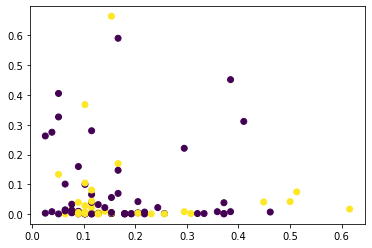

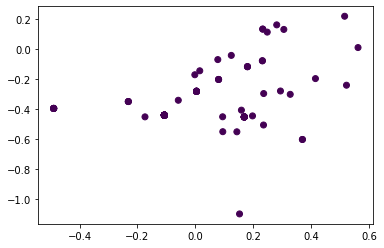

In [23]:
import matplotlib.pyplot as plt

plt.scatter(factuals['age'], factuals['length_of_stay'], c=factuals['score'])
# plt.xlim([0, 0.1])
plt.show()

plt.scatter(counterfactuals['age'], counterfactuals['length_of_stay'], c=counterfactuals['score'])
# plt.xlim([0, 0.1])
plt.show()

In [18]:
d_c = OnlineCatalog(data_name)

In [19]:
d_c._df.iloc[:num] = counterfactuals

In [20]:
model = MLModelCatalog(d_c, "ann", backend="pytorch")

In [25]:
post = model.predict(factuals)

C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\carla\models\catalog\ANN_TORCH\model_ann.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


In [22]:
post - pre

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [43]:
print(dataset._df.iloc[:num], d_c._df.iloc[:num])

        age  two_year_recid  priors_count  length_of_stay  score  \
0  0.205128             1.0      0.000000         0.01375      1   
1  0.653846             0.0      0.000000         0.00125      1   
2  0.076923             1.0      0.105263         0.00250      1   
3  0.333333             0.0      0.000000         0.00250      1   
4  0.294872             1.0      0.368421         0.00875      1   
5  0.320513             0.0      0.078947         0.00125      1   
6  0.269231             0.0      0.000000         0.00375      1   
7  0.115385             0.0      0.000000         0.00250      1   
8  0.064103             1.0      0.078947         0.00625      1   
9  0.243590             0.0      0.000000         0.00125      1   

   c_charge_degree_M  race_Other  sex_Male  
0                0.0         0.0       1.0  
1                0.0         1.0       1.0  
2                0.0         0.0       1.0  
3                1.0         1.0       1.0  
4                0.0      

In [24]:
counterfactuals.shape[0] - counterfactuals.dropna().shape[0]

2